## Grading
  
**Exam was supposed be only 30 points not 40 as labs and exams have equal weight according to syllabus and there are 3 labs of 10 point for each part of the course. So all the points for Exam 1 were rescaled from 40 point scale to 30 point scale. For example, $40$ points became $\frac{40 \cdot 3}{4}=30$ points, $25$ points became $\frac{25 \cdot 3}{4}=18.75$ etc. Apologies for confusion.**  
  
**Questions 1A, 1B and 2B:**  
*2.5 point each for correctly writing:*  
1) function of differential equations  
2) solve_ivp()  
3) plotting results  
4) correct answer  

**Question 2A:**  
*5 point for each correct equation*

## Exam 1. Introduction to Quantitative Methods in Biology

Import libraries that you'll need in the cell below

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Question 1
  
You work as an epidemiological modeler for the CDC.  
  
Your next assignment is to model the outbreak of flu in a Remote Town to help Remote Town leadership to prepare a response.  
  
You were informed that Remote Town population is 10,000 and that 1 infected person have arrived there four days ago. Due to a database error the leadership of Remote Town couldn't identify and isolate the infected person so the virus is spreading in Remote Town uncontrollably.  
  
While you're setting up a more elaborate model, you decide to get a few quick estimates to report to Remote Town leadership using simple SIR model:
  
$N = S + I + R$  
   
$\frac{dS}{dt}=-\gamma \cdot R_0 \cdot \frac{S}{N} \cdot I$  
  
$\frac{dI}{dt}=\gamma \cdot R_0 \cdot \frac{S}{N} \cdot I - \gamma \cdot I$  

$\frac{dR}{dt}=\gamma \cdot I$  
  
  You look up in the CDC database that $R_0=3$, $\gamma=0.2$ for this strain of flu.  
  You know that this database reports $\gamma$ in units $Day^{-1}$ while $R_0$ has no units

**Question 1A (10 points).** Remote Town can only treat 100 infected people at any given time. Use SIR model above to plot the number of Susceptible, Infected and Removed people over time with today being time=0. Estimate how many days will it take from today for the number of Infected people to surpass 100 people. Remember that infected person arrived four days ago and since this is only an estimate feel free to round to closest integer or include a range (e.g. 10-11 days after today).

**Answer: number of infected people will surpass 100 people 7-8 days after today**

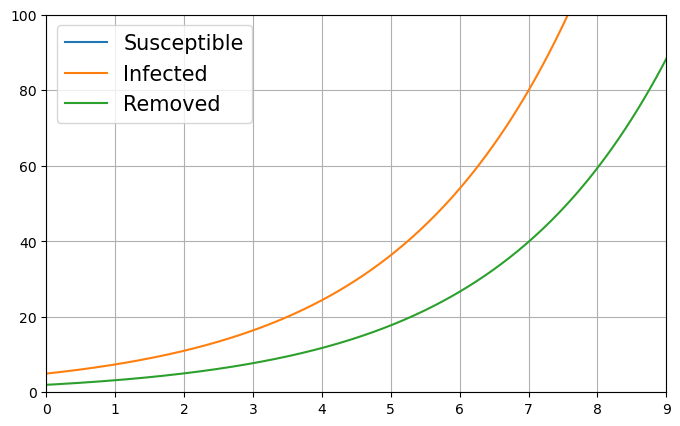

In [2]:
R0 = 3
γ = 0.2


def SIR_Model(t, y):
    S, I, R = y
    N = S + I + R
    dSdt = -γ * R0 * (S / N) * I
    dIdt = γ * R0 * (S / N) * I - γ * I
    dRdt = γ * I
    return [dSdt, dIdt, dRdt]


initial_condition = [10000, 1, 0]
tspan = [0, 30]
soln = solve_ivp(
    SIR_Model, tspan, initial_condition, t_eval=np.linspace(0, tspan[1], 1000)
)

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(soln.t-4, soln.y[0], label="Susceptible")
plt.plot(soln.t-4, soln.y[1], label="Infected")
plt.plot(soln.t-4, soln.y[2], label="Removed")
plt.xlim(0,9)
plt.ylim(0,100)
plt.grid()
plt.legend(fontsize=15);

**Question 1B  (10 points).** You were also informed that Remote Town leadership needs 30 days to gather the relevant resources to prepare for the full blown outbreak. From previous experience, Remote Town leadership estimates that they can have a lockdown in 3 days and they have two options: a partial lockdwon and a complete lockdown. Based on the measures that they can take you estimate that $R_0$ will drop to 2 for partial lockdown and 1.1 for complete lockdown. Plot the number of infected people with lockdown $R_0=1.1$ and $R_0=2$ and make a conclusion whether the partial or complete lockdown will be sufficient to prevent the number of infected people from surpassing 100 in 30 days or whether an even more drastic lockdown measures will have to be taken to slowdown the epidemic.

**Answer: complete lockdown is required, partial lockdown not sufficient**

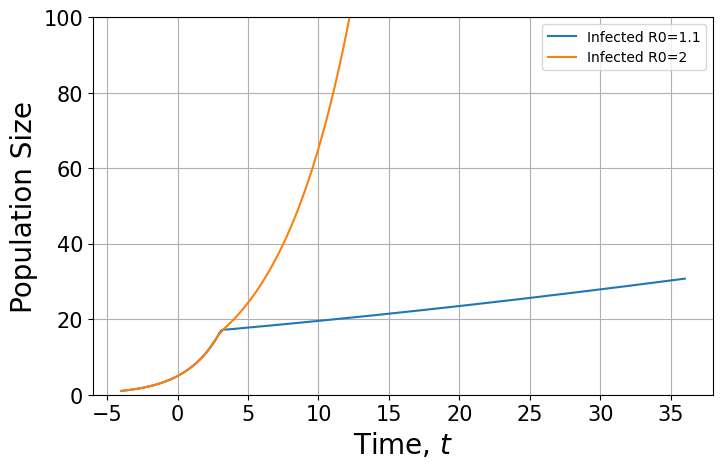

In [3]:
R0 = 3
γ = 0.2
plt.figure(figsize=(8, 5), dpi=100)

for k in [1.1, 2]:
    def SIR_Model(t, y):
        if 7 < t < 100:
            R0 = k
        else:
            R0 = 3

        S, I, R = y
        N = S + I + R
        dSdt = -γ * R0 * (S / N) * I
        dIdt = γ * R0 * (S / N) * I - γ * I
        dRdt = γ * I

        return [dSdt, dIdt, dRdt]

    initial_condition = [10000, 1, 0]
    tspan = [0, 40]
    soln = solve_ivp(
        SIR_Model, tspan, initial_condition, t_eval=np.linspace(0, tspan[1], 1000)
    )

    plt.plot(soln.t-4, soln.y[1], label=f"Infected R0={k}")

plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("Population Size", fontsize=20)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,100)
plt.grid()



## Question 2.
You want to model the dynamics of the following metabolic pathway.  
  
  $A_{extracellular}  \xrightarrow{X} A \xrightarrow{Y} B \xrightarrow{Z} B_{extracellular}$  
  - Metabolite A is imported into the cell using transporter X 
  - Metabolite A is converted into metabolite B using enzyme Y
  - B is exported outside the cell using transporter Z
  
Assume that extracellular volume is much larger than intracellular volume so $A_{extracellular}$ and $B_{extracellular}$ are constants and don't change over time. The only paramteres that are changing over time in this system are concentrtation of metabolites A and B.  
  
From experiments with purified enzymes you know the rate equations for reactions $A_{extracellular}  \xrightarrow{X} A$, $A \xrightarrow{Y} B$ and $B \xrightarrow{Z} B_{extracellular}$ catalyzed by transporter X, enzyme Y and transporter Z:

$Rate^X=\frac{V_{max}^X \cdot A_{extracellular}}{K_M^X+A_{extracellular}}$ where $V_{max}^X=1$ and $K_M^X=1$. In other words, $Rate^X$ is a rate of $A_{extracellular}  \xrightarrow{X} A$ reaction.
  
$Rate^Y=\frac{V_{max}^Y \cdot A}{K_M^Y+A}$ where $V_{max}^Y=2$ and $K_M^Y=1$. In other words, $Rate^Y$ is a rate of $A  \xrightarrow{Y} B$ reaction.
  
$Rate^Z=\frac{V_{max}^Z \cdot B}{K_M^Z+B}$ where $V_{max}^Z=10$ and $K_M^Z=1$. In other words, $Rate^Z$ is a rate of $B  \xrightarrow{Z} B_{extracellular}$ reaction.

$A_{extracellular}, A, B, B_{extracellular}$ are concentration of relevant metabolites

**Question 2A (10 points).** Write down differential equations that descibe the dynamics of intracellular concentrations of $A$ and $B$ using the information above. You'll need to write down a total of two differential equations: one for $\frac{dA}{dt}$ and one for $\frac{dB}{dt}$.

$\frac{dA}{dt}=\frac{V_{max}^X \cdot A_{extracellular}}{K_M^X+A_{extracellular}} - \frac{V_{max}^Y \cdot A}{K_M^Y+A}$
  
$\frac{dB}{dt}=\frac{V_{max}^Y \cdot A}{K_M^Y+A} - \frac{V_{max}^Z \cdot B}{K_M^Z+B}$  

**OR**

$\frac{dA}{dt}=Rate^X - Rate^Y$
  
$\frac{dB}{dt}=Rate^Y - Rate^Z$  





**Question 2B (10 points).** Solve the above system of differential equations using your prefered method and plot the changes in intracellular concentrations of $A$ and $B$ over timeframe 0-100 using initial conditions of  $A_{extracellular}$=10 and the rest of metabolites=0.

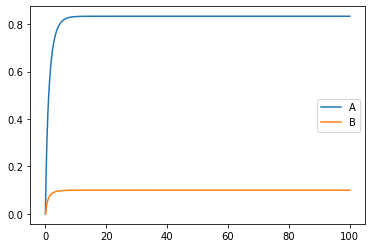

In [4]:
A_extra=10
Vmax_X=1
Vmax_Y=2
Vmax_Z=10
Km_X=1
Km_Y=1
Km_Z=1

def MetabolicPathway(t, y):
    A, B = y
    dAdt = Vmax_X*A_extra/(Km_X+A_extra)-Vmax_Y*A/(Km_Y+A)
    dBdt = Vmax_Y*A/(Km_Y+A) - Vmax_Z*B/(Km_Z+B) 
    return [dAdt, dBdt]


initial_condition = [0, 0]
tspan = [0, 100]

# Remove atol, rtol to see how solution of phase plot change to get a sense of importance of these parameters
soln = solve_ivp(
    MetabolicPathway,
    tspan,
    initial_condition,
    t_eval=np.linspace(tspan[0], tspan[1], 1000),
)

plt.plot(soln.t,soln.y[0], label="A")
plt.plot(soln.t,soln.y[1], label="B")
plt.legend();